# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#Units of measurement. standard, metric and imperial units are available. If you do not use the units parameter, standard units will be applied by default.
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_name = []
city_id = []
temp = []
max_temp = []
min_temp = []
latitude = []
humidity = []
cloudiness = []
wind_speed = []
longitude = []
country = []
feels_like = []
date = []

counter = 0

for i in cities:
    response = requests.get(query_url + i).json()
    counter = counter + 1
    print (f"{counter} {i}")
    try:
        city_id.append(response["id"])
        city_name.append(response["name"])
        cloudiness.append(response['clouds']['all'])
        country.append(response["sys"]["country"])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        max_temp.append(response['main']['temp_max'])
        min_temp.append(response['main']['temp_min'])
        feels_like.append(response['main']['feels_like'])
        wind_speed.append(response['wind']['speed'])
        
    except:
        print("city not found")

1 saint-philippe
2 beringovskiy
3 hofn
4 mys shmidta
city not found
5 birin
6 hobart
7 rikitea
8 pevek
9 los llanos de aridane
10 kamenka
11 port moresby
12 cidreira
13 mahon
14 westerland
15 palabuhanratu
city not found
16 hermanus
17 abeche
18 cape town
19 aransas pass
20 fairbanks
21 chuy
22 avera
23 busselton
24 taolanaro
city not found
25 upernavik
26 conceicao do araguaia
27 ixtapa
28 tabialan
city not found
29 victoria
30 mataura
31 yellowknife
32 kiruna
33 bengkulu
34 yanchukan
city not found
35 puerto ayora
36 verkhnyaya inta
37 mporokoso
38 albany
39 torbay
40 gelemso
41 ushuaia
42 lavrentiya
43 sitka
44 wattegama
45 boa vista
46 araouane
47 bredasdorp
48 punta arenas
49 hasaki
50 beihai
51 saskylakh
52 bucerias
53 tuktoyaktuk
54 jamestown
55 ouallam
56 butaritari
57 nichlaul
58 kaitangata
59 hilo
60 severo-kurilsk
61 carnarvon
62 nowy sacz
63 souillac
64 dikson
65 samusu
city not found
66 ponta delgada
67 kahului
68 hithadhoo
69 mecca
70 aswan
71 castro
72 constitucion
73 is

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_dict = {
    "City_ID": city_id,
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temp in F": max_temp,
    "Min Temp in F": min_temp,
    "Wind Speed": wind_speed,
    "Temp in F": temp,
    "Feels Like": feels_like,
}
city_data = pd.DataFrame(city_dict)
city_data.sort_values('City_ID')
city_data.to_csv("output/cities.csv",index=False, header=True)

city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp in F,Min Temp in F,Wind Speed,Temp in F,Feels Like
0,935215,Saint-Philippe,38,RE,1604615440,64,-21.36,55.77,71.60,68.00,4.70,68.92,68.22
1,2126710,Beringovskiy,100,RU,1604615440,90,63.05,179.32,38.21,38.21,13.31,38.21,27.70
2,2630299,Hofn,19,IS,1604615440,70,64.25,-15.21,44.85,44.85,40.89,44.85,18.82
3,1283334,Birin,2,NP,1604615440,95,26.89,88.07,49.21,49.21,3.65,49.21,46.67
4,2163355,Hobart,75,AU,1604615377,50,-42.88,147.33,57.00,55.00,17.22,55.85,43.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,777019,Vardø,75,NO,1604615560,85,70.37,31.11,33.80,33.80,12.75,33.80,22.73
574,4771808,Martinsville,1,US,1604615446,54,36.69,-79.87,60.01,57.20,2.15,58.71,55.71
575,1633034,Palu,100,ID,1604615561,76,-0.89,119.87,78.57,78.57,2.39,78.57,85.03
576,7535681,Saint-Agapit,75,CA,1604615561,70,46.56,-71.44,51.80,46.40,2.24,49.98,46.62


In [8]:
city_data.loc[city_data["Humidity"] > 100]
#No cities with over 100% humidity

,City_ID,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp in F,Min Temp in F,Wind Speed,Temp in F,Feels Like


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

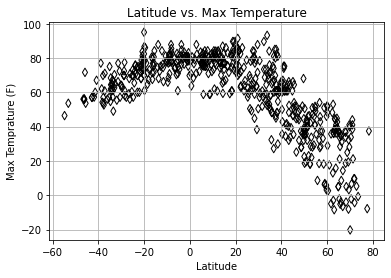

In [9]:
plt.scatter(
    city_data["Latitude"], 
    city_data["Max Temp in F"],
    marker = "d",
    edgecolors = 'black',
    color = 'none')
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temprature (F)")
plt.grid()
plt.rcParams["figure.figsize"] = [10, 8]
plt.savefig("output/max_temp.png")
plt.show()

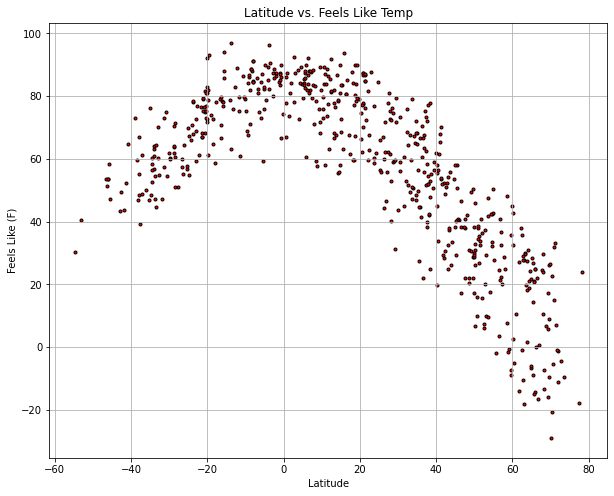

In [10]:

plt.scatter(
    city_data["Latitude"], 
    city_data["Feels Like"],
    marker = ".",
    edgecolors = 'black',
    color = 'red')
plt.title("Latitude vs. Feels Like Temp")
plt.xlabel("Latitude")
plt.ylabel("Feels Like (F)")
plt.grid()
plt.rcParams["figure.figsize"] = [10, 5]
plt.savefig("output/feelslike_temp.png")
plt.show()

## Latitude vs. Humidity Plot

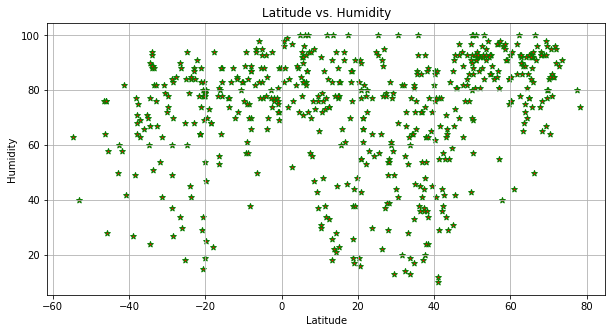

In [11]:
plt.scatter(
    city_data["Latitude"], 
    city_data["Humidity"],
    marker = "*",
    edgecolors = 'green',
    color = 'red')
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.rcParams["figure.figsize"] = [10, 7]
plt.savefig("output/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

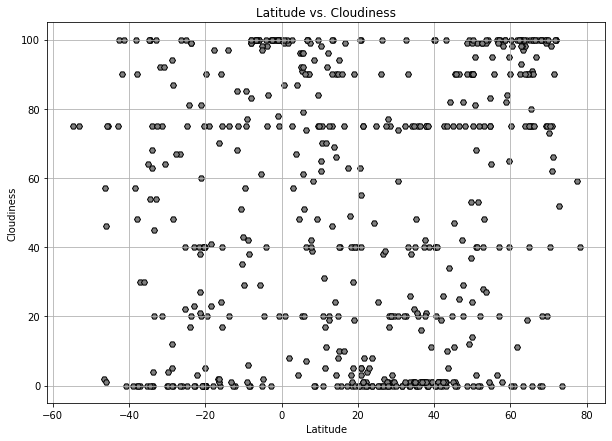

In [12]:
plt.scatter(
    city_data["Latitude"], 
    city_data["Cloudiness"],
    marker = "H",
    edgecolors = 'black',
    color = 'gray')
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.rcParams["figure.figsize"] = [10, 7]
plt.savefig("output/lat_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

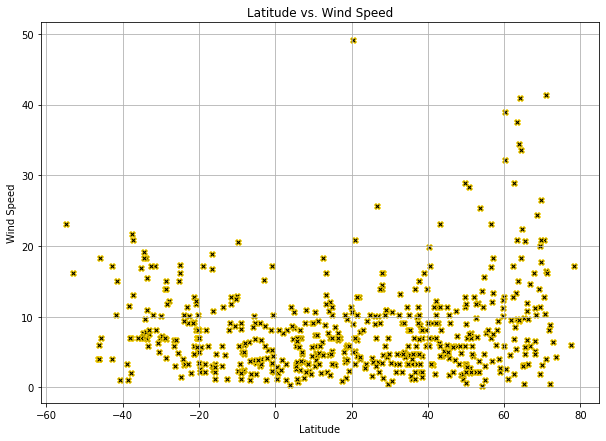

In [13]:
plt.scatter(
    city_data["Latitude"], 
    city_data["Wind Speed"],
    marker = "X",
    edgecolors = 'gold',
    color = 'black')
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.rcParams["figure.figsize"] = [7, 10]
plt.savefig("output/lat_wind.png")
plt.show()

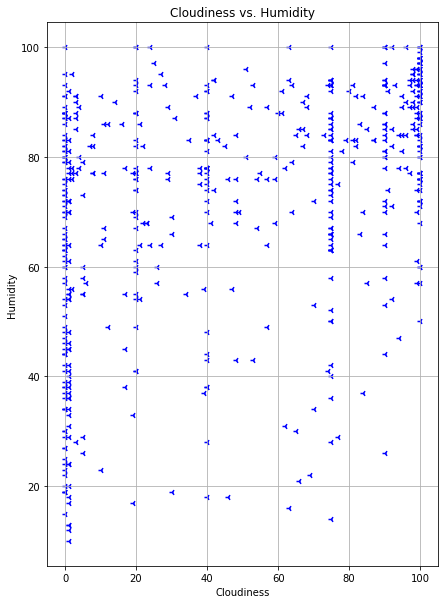

In [14]:
plt.scatter(
    city_data["Cloudiness"], 
    city_data["Humidity"],
    marker = "3",
    color = 'blue')
plt.title("Cloudiness vs. Humidity")
plt.xlabel("Cloudiness")
plt.ylabel("Humidity")
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.savefig("output/cloudiness_humidity.png")
plt.show()

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    lr_values = x * slope + intercept
    lr_equate = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return lr_values , lr_equate, rvalue

In [16]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_data.loc[city_data["Latitude"] >0]
s_hemi_df = city_data.loc[city_data["Latitude"] <0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

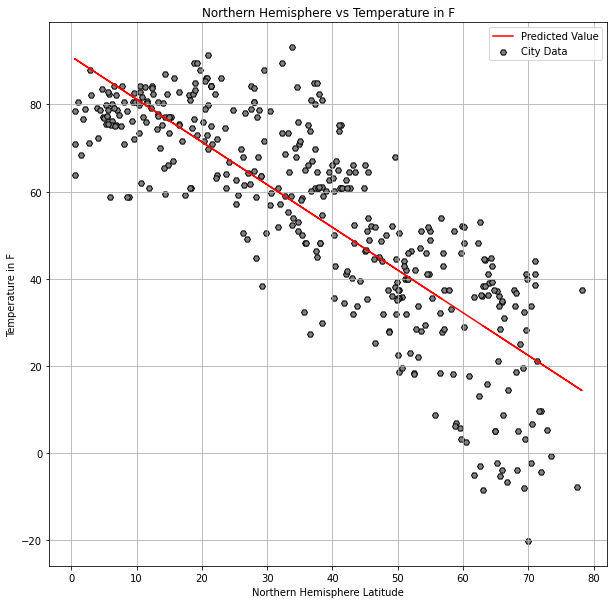

In [17]:
x_north = n_hemi_df['Latitude']
y_north = n_hemi_df['Max Temp in F']

reg, lr_equate, rvalue = linear_regression(x_north,y_north)

#plt.scatter(x_north,y_north)
plt.scatter(
    x_north, 
    y_north,
    marker = "H",
    edgecolors = 'black',
    color = 'gray',
    label = 'City Data')
plt.plot(x_north,reg,"r-", label='Predicted Value')
plt.title("Northern Hemisphere vs Temperature in F")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Temperature in F')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_NorthernHemi_Temp_Lat.png")
plt.show()

In [20]:
correlation_matrix = np.corrcoef(x_north, y_north)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.6816480621157439


In [ ]:
#In this example, 0.68 shows a possibility for a reasonable correlation. 
#Add that to the data points and it shows a trend but not quite enough to declare that there is a trusted correlation.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

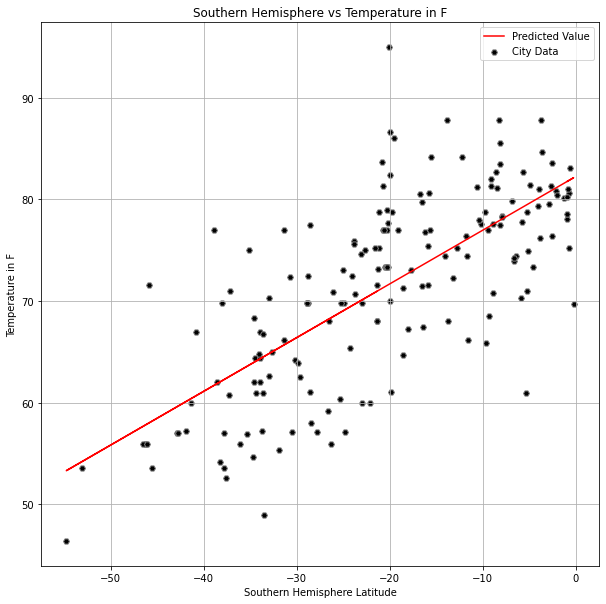

In [21]:
x_south = s_hemi_df['Latitude']
y_south = s_hemi_df['Max Temp in F']

reg, lr_equate, rvalue = linear_regression(x_south,y_south)

#plt.scatter(x_south,y_south)
plt.scatter(
    x_south, 
    y_south,
    marker = "H",
    edgecolors = 'gray',
    color = 'black',
    label = 'City Data')
plt.plot(x_south,reg,"r-", label='Predicted Value')
plt.title("Southern Hemisphere vs Temperature in F")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Temperature in F')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_SouthernernHemi_Temp_Lat.png")
plt.show()

In [22]:
correlation_matrix = np.corrcoef(x_south, y_south)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.5248736684338207


In [ ]:
# There are more outliers in the southern hemisphere than what we saw in the northern.
# The data points show a similar trend relative to the linear regression, however the extra outliers show limited correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

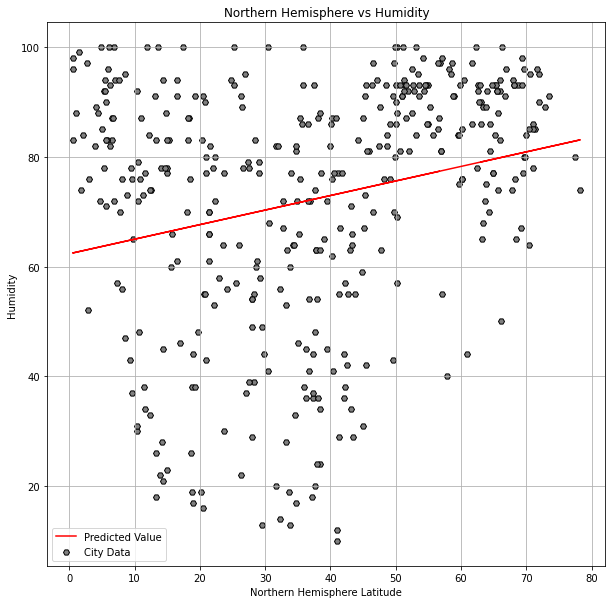

In [24]:
x_north = n_hemi_df['Latitude']
y_north = n_hemi_df['Humidity']

reg, lr_equate, rvalue = linear_regression(x_north,y_north)

#plt.scatter(x_north,y_north)
plt.scatter(
    x_north, 
    y_north,
    marker = "H",
    edgecolors = 'black',
    color = 'gray',
    label = 'City Data')
plt.plot(x_north,reg,"r-", label='Predicted Value')
plt.title("Northern Hemisphere vs Humidity")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 8]
plt.legend()
plt.savefig("output/Linear_NorthernHemi_Humidity_Lat.png")
plt.show()

In [25]:
correlation_matrix = np.corrcoef(x_north, y_north)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.05728910623574042


In [ ]:
# There appears to be little to no correlation between the northern hemisphere and the humidity percentage.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

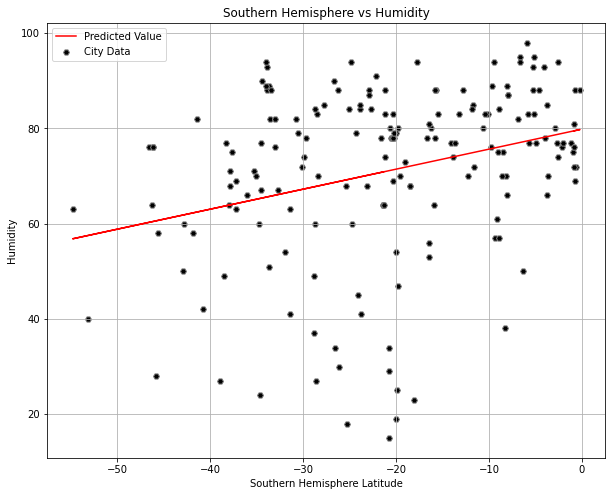

In [26]:
x_south = s_hemi_df['Latitude']
y_south = s_hemi_df['Humidity']

reg, lr_equate, rvalue = linear_regression(x_south,y_south)

#plt.scatter(x_south,y_south)
plt.scatter(
    x_south, 
    y_south,
    marker = "H",
    edgecolors = 'gray',
    color = 'black',
    label = 'City Data')
plt.plot(x_south,reg,"r-", label='Predicted Value')
plt.title("Southern Hemisphere vs Humidity")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_SouthernernHemi_Humidity_Lat.png")
plt.show()

In [27]:
correlation_matrix = np.corrcoef(x_south, y_south)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.08893085731245108


In [ ]:
# Just as the northern hemisphere to humidity percentage shows, there appears to be little to no correlation between the hemisphere and the humidity percentage.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

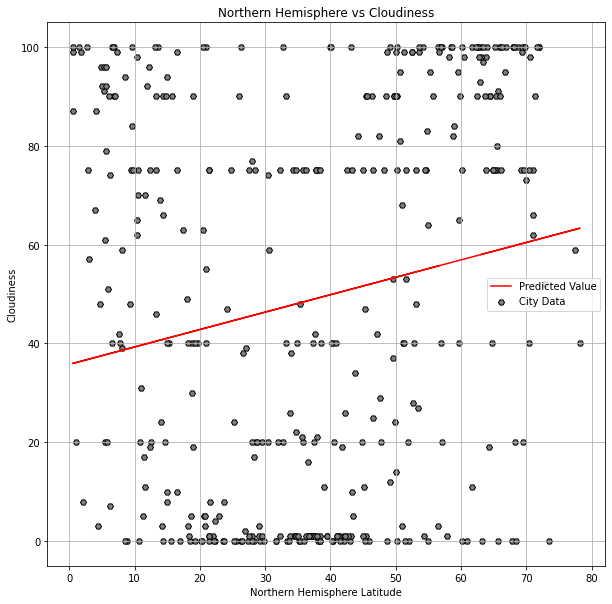

In [29]:
x_north = n_hemi_df['Latitude']
y_north = n_hemi_df['Cloudiness']

reg, lr_equate, rvalue = linear_regression(x_north,y_north)

#plt.scatter(x_north,y_north)
plt.scatter(
    x_north, 
    y_north,
    marker = "H",
    edgecolors = 'black',
    color = 'gray',
    label = 'City Data')
plt.plot(x_north,reg,"r-", label='Predicted Value')
plt.title("Northern Hemisphere vs Cloudiness")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_NorthernHemi_Cloudiness_Lat.png")
plt.show()

In [30]:
correlation_matrix = np.corrcoef(x_north, y_north)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.03386634894148743


In [ ]:
#There is nothing to suggest a correlation between location and cloudiness in the given data. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

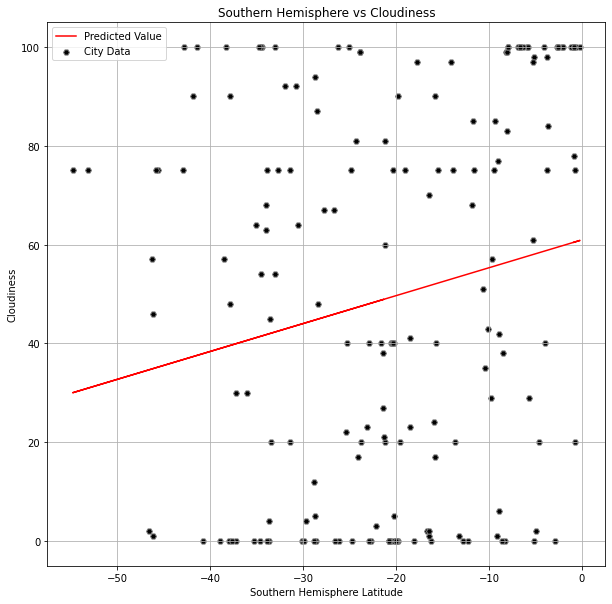

In [31]:
x_south = s_hemi_df['Latitude']
y_south = s_hemi_df['Cloudiness']

reg, lr_equate, rvalue = linear_regression(x_south,y_south)

#plt.scatter(x_south,y_south)
plt.scatter(
    x_south, 
    y_south,
    marker = "H",
    edgecolors = 'gray',
    color = 'black',
    label = 'City Data')
plt.plot(x_south,reg,"r-", label='Predicted Value')
plt.title("Southern Hemisphere vs Cloudiness")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_SouthernernHemi_Cloudiness_Lat.png")
plt.show()

In [32]:
correlation_matrix = np.corrcoef(x_south, y_south)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.035066266148561336


In [ ]:
#There is nothing to suggest a correlation between location and cloudiness in the given data. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

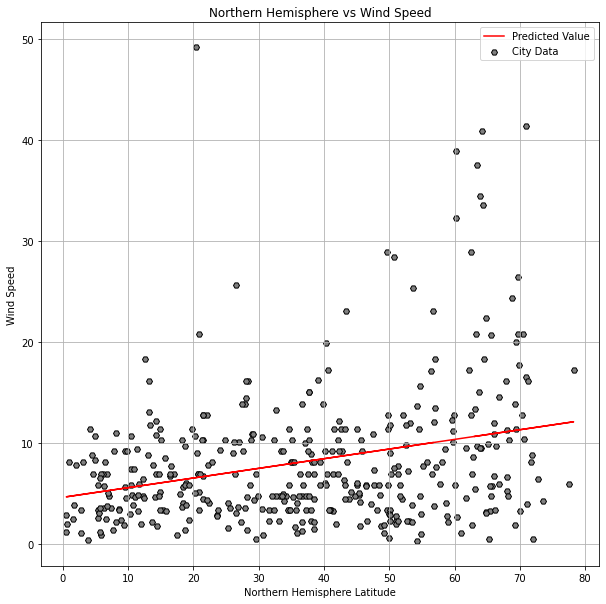

In [33]:
x_north = n_hemi_df['Latitude']
y_north = n_hemi_df['Wind Speed']

reg, lr_equate, rvalue = linear_regression(x_north,y_north)

#plt.scatter(x_north,y_north)
plt.scatter(
    x_north, 
    y_north,
    marker = "H",
    edgecolors = 'black',
    color = 'gray',
    label = 'City Data')
plt.plot(x_north,reg,"r-", label='Predicted Value')
plt.title("Northern Hemisphere vs Wind Speed")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_NorthernHemi_Wind_Lat.png")
plt.show()

In [34]:
correlation_matrix = np.corrcoef(x_north, y_north)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.08162129519416614


In [ ]:
#Just looking at the data points, I expected the r value on this graph to be closer.
#There are a few points that fell perfectly in line, however the outliers show that there is no correlation. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

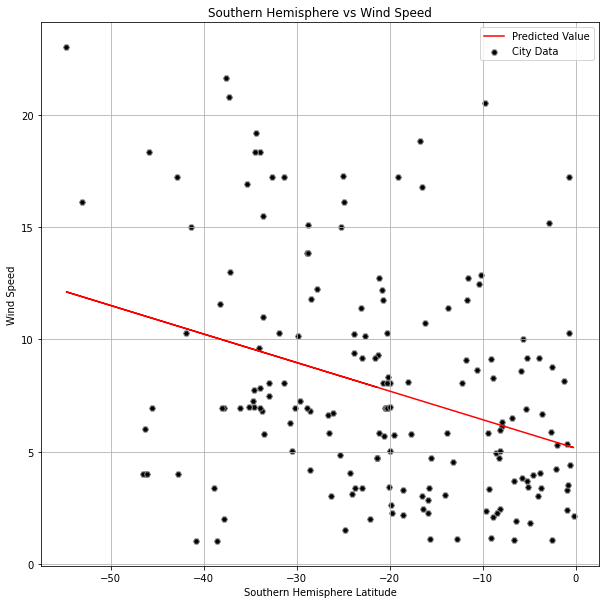

In [35]:
x_south = s_hemi_df['Latitude']
y_south = s_hemi_df['Wind Speed']

reg, lr_equate, rvalue = linear_regression(x_south,y_south)

#plt.scatter(x_south,y_south)
plt.scatter(
    x_south, 
    y_south,
    marker = "H",
    edgecolors = 'gray',
    color = 'black',
    label = 'City Data')
plt.plot(x_south,reg,"r-", label='Predicted Value')
plt.title("Southern Hemisphere vs Wind Speed")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.rcParams["figure.figsize"] = [10, 10]
plt.legend()
plt.savefig("output/Linear_SouthernernHemi_WindSpeed_Lat.png")
plt.show()

In [36]:
correlation_matrix = np.corrcoef(x_south, y_south)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.1080255284532008


In [ ]:
#Interestingly enough, I expected this plot to show less of a correlation than the northern hemisphere and wind speed. The model shows that it is slightly closer.
#However, the model shows that there is no correlation on either hemisphere. 